In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from pymc3.distributions.timeseries import GaussianRandomWalk
import seaborn as sns
import pandas as pd
from theano import tensor as T

C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
wheather = pd.read_csv('C:/Users/DESUSAI/Desktop/Book1.csv',sep=';')

In [3]:
wheather.head()

,Jun,high,avg,low
0,1,29,19,8
1,2,32,21,11
2,3,32,21,9
3,4,24,17,9
4,5,19,11,2


In [4]:
n_days = wheather.shape[0]

In [13]:
std=wheather.high.std()

In [16]:
mn=wheather.high.mean();

In [18]:
mn =1/mn

In [19]:
mn

0.043478260869565216

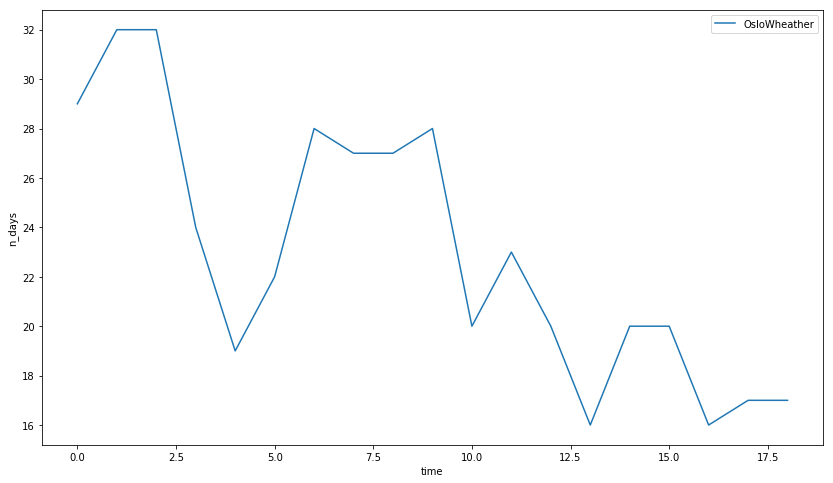

In [15]:
plt.subplots(figsize=(14, 8))
plt.plot(wheather.high,label='OsloWheather')
plt.xlabel('time', size=10)
plt.ylabel('n_days',size=10)
plt.legend();

In [20]:
with pm.Model() as model:
    step_size = pm.Exponential('step_size', mn)
    s = GaussianRandomWalk('s', sd=step_size,
                           shape=len(wheather.high))

    nu = pm.Exponential('nu', .1)

    r = pm.StudentT('r', nu=nu,
                    lam=pm.math.exp(-2*s),
                    observed=wheather.high)

In [24]:
with model:
   
    trace = pm.sample(tune=500,nuts_kwargs=dict(target_accept=.9),progressbar=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████████████████████████████████| 1000/1000 [00:16<00:00, 60.48it/s]


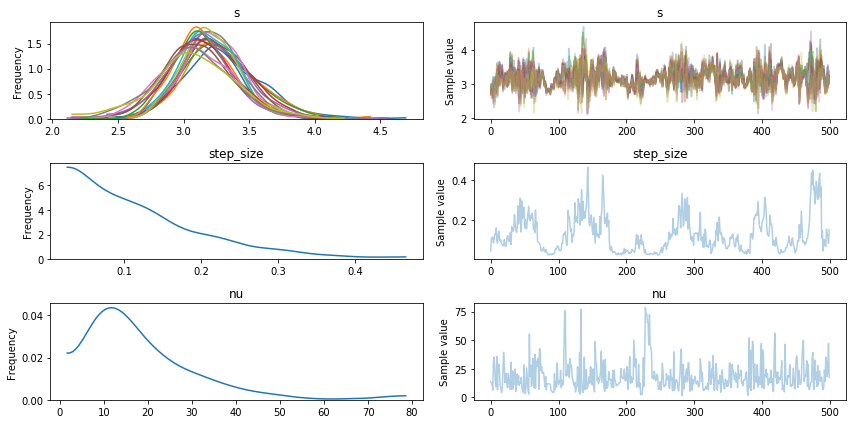

In [38]:
pm.traceplot(trace);

In [35]:
pm.summary(trace)


s:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3.313            0.309            0.021            [2.792, 3.943]
  3.305            0.279            0.020            [2.820, 3.863]
  3.293            0.275            0.019            [2.838, 3.856]
  3.268            0.256            0.017            [2.805, 3.800]
  3.242            0.267            0.017            [2.744, 3.759]
  3.233            0.258            0.016            [2.799, 3.746]
  3.229            0.237            0.015            [2.786, 3.694]
  3.225            0.232            0.015            [2.774, 3.637]
  3.212            0.226            0.015            [2.769, 3.664]
  3.192            0.224            0.015            [2.702, 3.563]
  3.168            0.239            0.015            [2.690, 3.602]
  3.165            0.234            0.015            [2.734, 3.612]
  3.146            0.244            

In [37]:
wheather.head(20)

,Jun,high,avg,low
0,1,29,19,8
1,2,32,21,11
2,3,32,21,9
3,4,24,17,9
4,5,19,11,2
5,6,22,13,4
6,7,28,17,6
7,8,27,18,9
8,9,27,18,8
9,10,28,18,9
